# Import all necessary modules and load the data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
sns.set(color_codes=True)

In [2]:
Data = pd.read_csv('Data - parkinsons.csv')
Data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In the above dataset our Target Variable (status) is in middle of the dataset so for our convenient to drop the status column
from original place and add to last of the dataset.

In [3]:
Status = Data['status']
Data.drop(['status'],axis=1,inplace = True)
Data['status']=Status
Data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


Now the Target variable is added at the end of the dataset.

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file,
number of attributes,types of attributes and a general idea of likely challenges in the dataset.

In [4]:
Data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status'],
      dtype='object')

# Print the datatypes of each column and the shape of the dataset

In [5]:
Data.shape

(195, 24)

The dataset has 195 rows and 24 columns.

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# The data has 195 instances with 24 attributes. 1 object type, 1 integer type and 22 float types.

# Check Missing values

In [7]:
Data.isnull().sum().T

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

# There are no null values in any of the column.

# Print the descriptive statistics of each and every column using describe()function.

In [8]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


The above output printsthe important summary statistics of all the numeric variables like the mean,median(50%),minimum,maximum values along with the standard deviation.

# Using univariate and bivariate analysis to check the individual attributes for their basic statistics such as central values,spread,tails,relationships between variables. 


# Distribution of all the independent variables individually

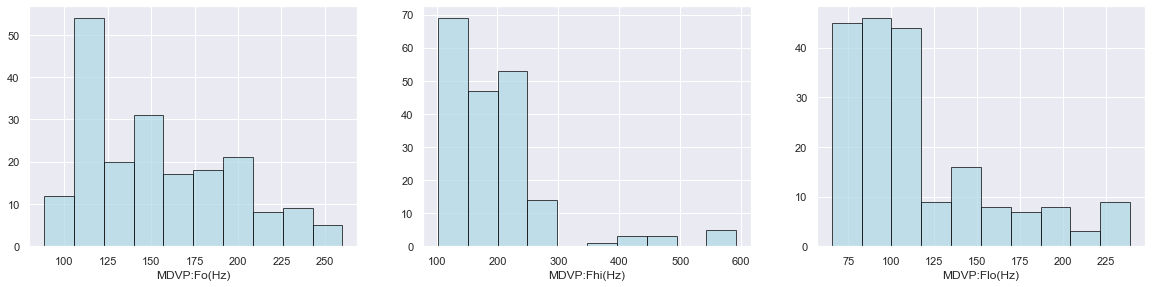

In [9]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(Data['MDVP:Fo(Hz)'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Fo(Hz)')


plt.subplot(3,3,2)
plt.hist(Data['MDVP:Fhi(Hz)'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Fhi(Hz)')


plt.subplot(3,3,3)
plt.hist(Data['MDVP:Flo(Hz)'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Flo(Hz)')

plt.show()

Attribute(MDVP:Fo(Hz))seems to be distributed quiet uniformally. 
Attribute(MDVP:Fhi(Hz)) seems to be distributed skewed.


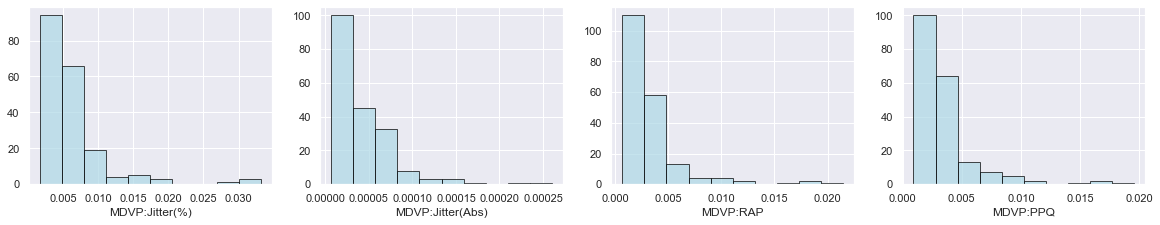

In [10]:
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
plt.hist(Data['MDVP:Jitter(%)'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Jitter(%)')


plt.subplot(4,4,2)
plt.hist(Data['MDVP:Jitter(Abs)'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Jitter(Abs)')


plt.subplot(4,4,3)
plt.hist(Data['MDVP:RAP'],  color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:RAP')


plt.subplot(4,4,4)
plt.hist(Data['MDVP:PPQ'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:PPQ')

plt.show()

The distribution of all the above four attributes are right skewed because tails goes to the right.

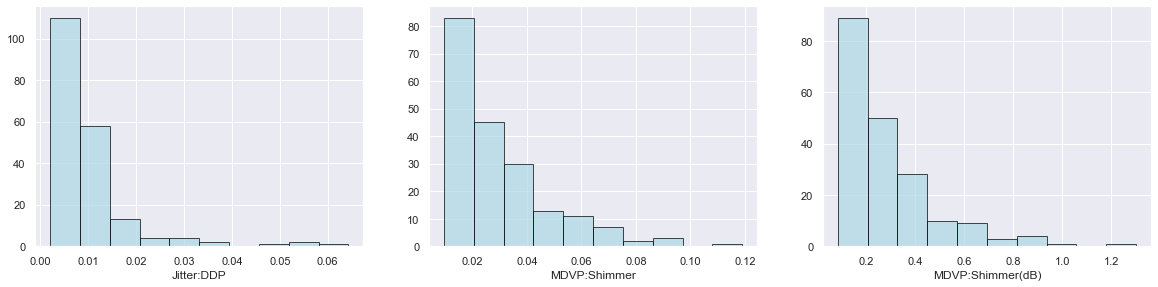

In [11]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(Data['Jitter:DDP'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('Jitter:DDP')


plt.subplot(3,3,2)
plt.hist(Data['MDVP:Shimmer'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Shimmer')


plt.subplot(3,3,3)
plt.hist(Data['MDVP:Shimmer(dB)'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Shimmer(dB)')


plt.show()

The distribution of the abve three attributes are right skewed because tails goes to the right.

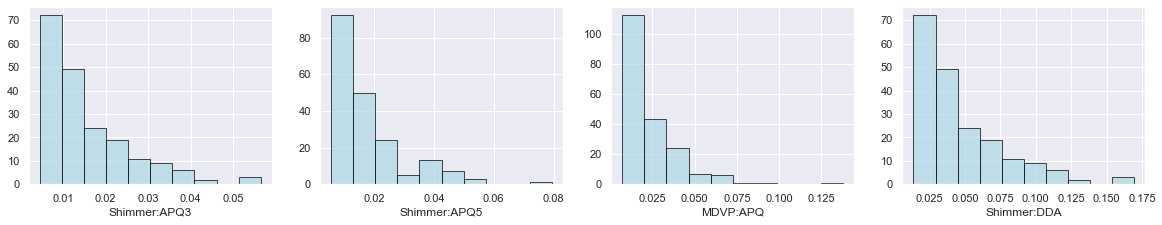

In [12]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
plt.hist(Data['Shimmer:APQ3'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('Shimmer:APQ3')


plt.subplot(4,4,2)
plt.hist(Data['Shimmer:APQ5'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('Shimmer:APQ5')


plt.subplot(4,4,3)
plt.hist(Data['MDVP:APQ'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:APQ')


plt.subplot(4,4,4)
plt.hist(Data['Shimmer:DDA'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('Shimmer:DDA')


plt.show()

The distribution of the above four attributes are right skewed because tails goes to the right.

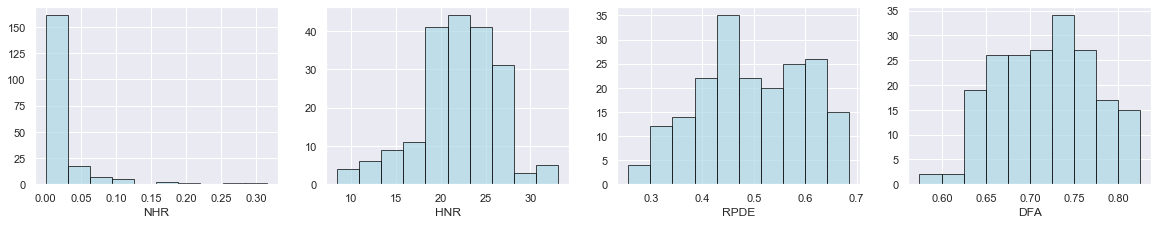

In [13]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
plt.hist(Data['NHR'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('NHR')

plt.subplot(4,4,2)
plt.hist(Data['HNR'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('HNR')


plt.subplot(4,4,3)
plt.hist(Data['RPDE'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('RPDE')


plt.subplot(4,4,4)
plt.hist(Data['DFA'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('DFA')


plt.show()

The distribution of the attribute (NHR)is rightly skewed and other three attributes are normally distributed.

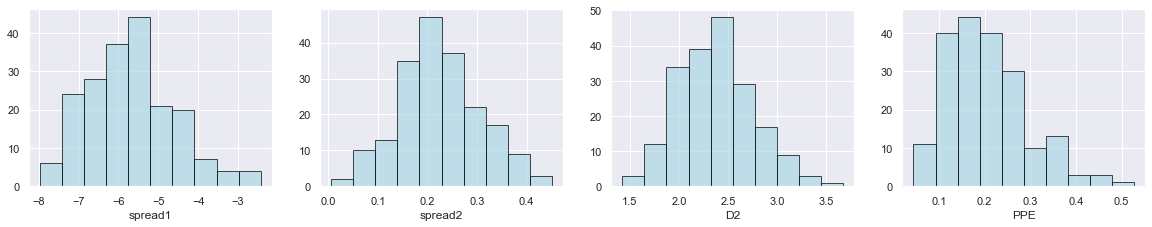

In [14]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
plt.hist(Data['spread1'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('spread1')


plt.subplot(4,4,2)
plt.hist(Data['spread2'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('spread2')


plt.subplot(4,4,3)
plt.hist(Data['D2'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('D2')


plt.subplot(4,4,4)
plt.hist(Data['PPE'], color='lightblue',edgecolor = 'black', alpha = 0.7)
plt.xlabel('PPE')


plt.show()

The distribution of the above four attributes are normally distributed.

# Distribution of Target variable

In [15]:
Data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

Here out of 195 data point: 147 labeled as 1 signifies that the person have parkinsons. whereas, 48 labeled as 0 signifies that the persons are healthy.

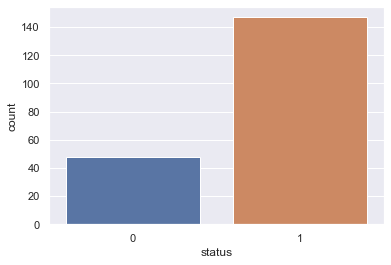

In [16]:
sns.countplot(Data['status'])

From the above analysis its been observed that out of 195 ,147  persons have the parkinson's and 48 persons have not means they are healthy.

# Using Correlation method to observe the relationship between different variables.

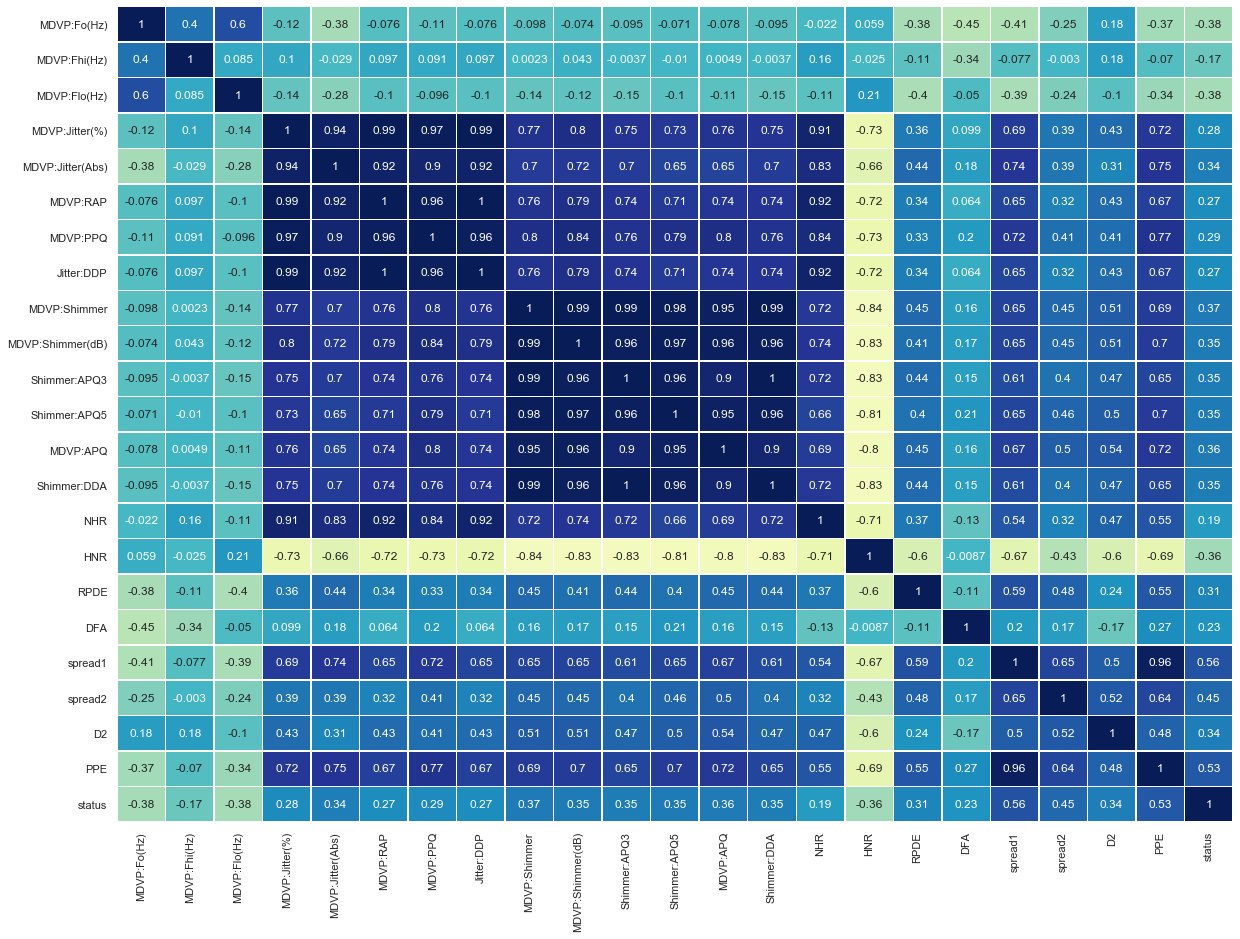

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(Data.corr(),
           annot=True,
           linewidths=.5,
           center=0,
           cbar=False,
           cmap="YlGnBu")
plt.show()

Observations: 
    - we can see that MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ ,NHRand Jitter:DDPare highly correlated with MDVP:Jitter(%)
    - MDVP:Jitter(%),MDVP:RAP,MDVP:PPQ,Jitter:DDP and NHR are highly correlated with MDVP:Jitter(Abs)
    - MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,Jitter:DDP and NHR are highly correlated with MDVP:RAP
    - MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,Jitter:DDP and NHR are highly correlated with MDVP:PPQ
    - MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ and NHR are highly correlated with Jitter:DDP
Also, MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ and Shimmer:DDA are highly correlated with MDVP:Shimmer
    - MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ and Shimmer:DDA are highly correlated with MDVP:Shimmer:(dB)
    - MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ5,MDVP:APQ and Shimmer:DDA are highly correlated with Shimmer:APQ3
    - MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,MDVP:APQ and Shimmer:DDA are highly correlated with Shimmer:APQ5
    - MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5 and Shimmer:DDAare highly correlated with MDVP:APQ
    - MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5 and MDVP:APQ are highly correlated with Shimmer:DDA
    - The relationship between spread1 and PPE is highly correlated   
Most of the features are correlated to each other.
few features are not having much relationship.

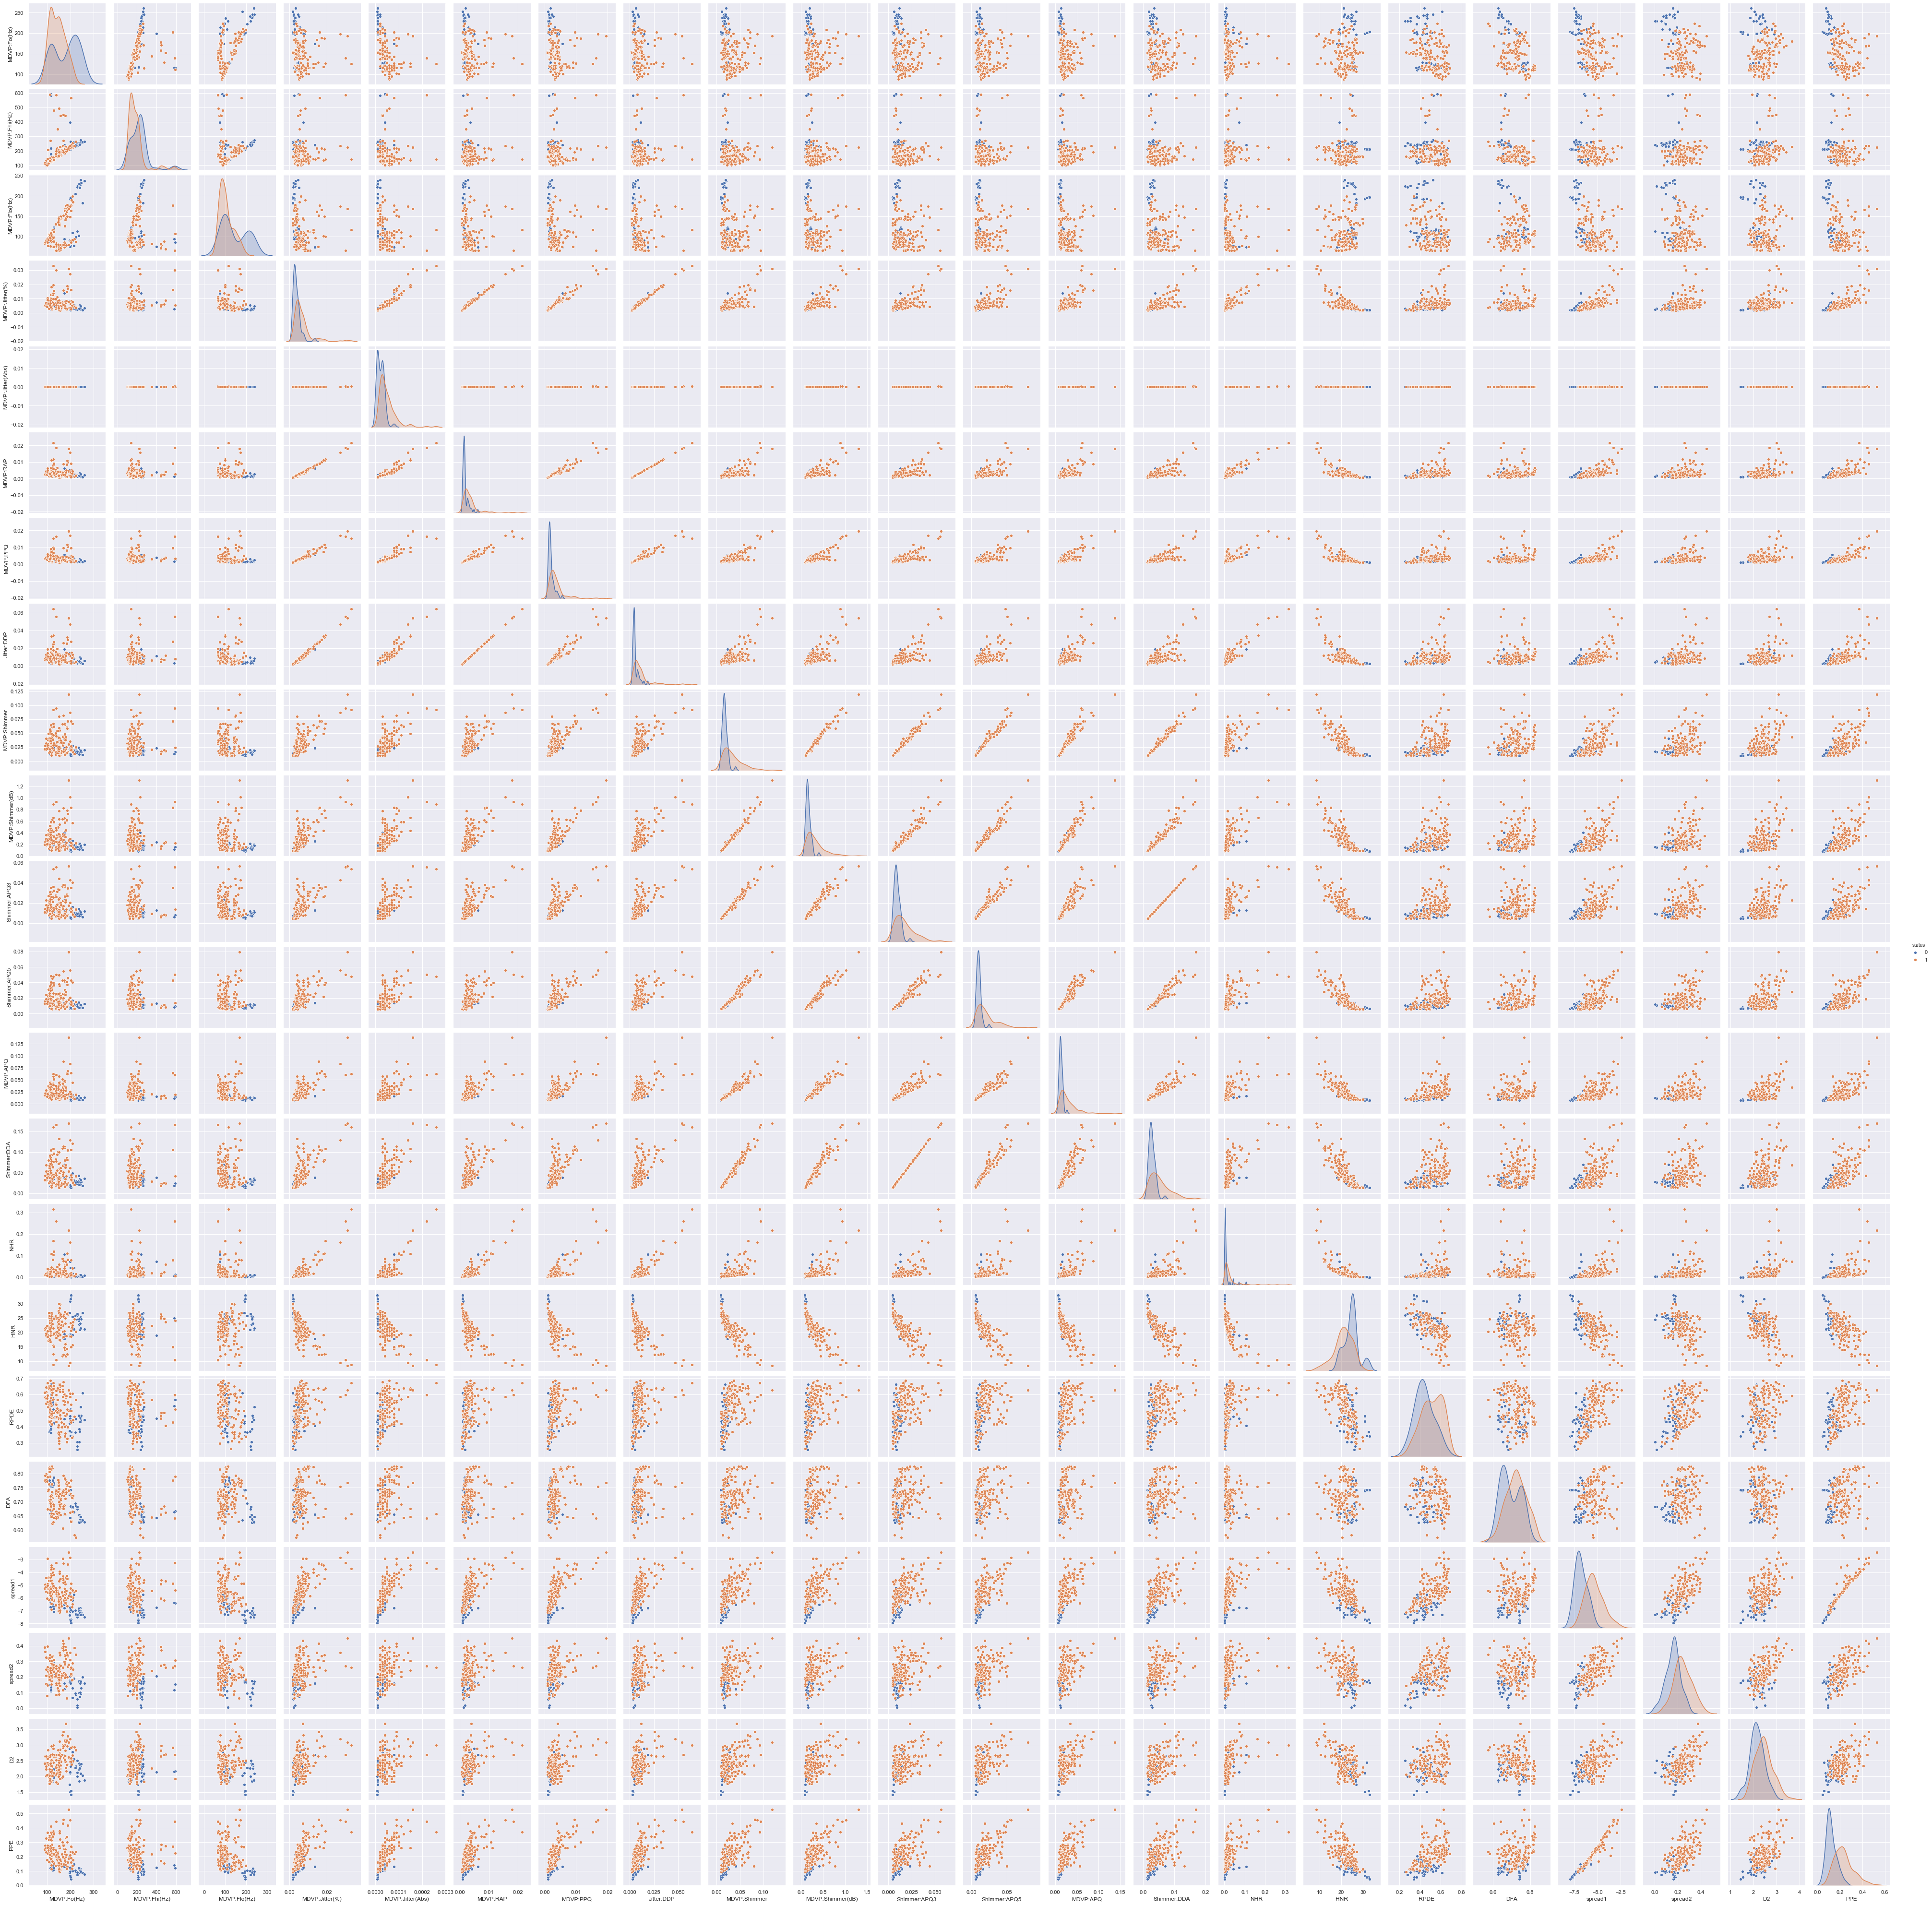

In [18]:
sns.pairplot(Data, diag_kind= 'kde', hue = 'status')
plt.show()

# Here we have not required Name column of the dataset so we drop it

In [19]:
Data = Data.drop('name', axis = 1)
Data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


# Split the dataset into training and testset in the ratio of 70:30 (Training:Test)

In [20]:
X = Data.drop('status', axis=1)
y = Data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

X_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
42,237.226,247.326,225.227,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.164,...,0.01133,0.03104,0.00740,22.736,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
17,168.778,232.181,75.603,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,0.348,...,0.03430,0.04322,0.02919,20.376,0.631099,0.605417,-2.931070,0.434326,3.007463,0.430788
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
120,128.940,479.697,88.251,0.00581,0.00005,0.00241,0.00314,0.00723,0.02008,0.221,...,0.01734,0.02548,0.02350,24.743,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
98,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,...,0.03908,0.07625,0.10323,15.433,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375


Lets check split of the data

In [21]:
print("{0:0.2f}% Data is in training set".format((len(X_train)/len(Data.index))*100))
print("{0:0.2f}% Data is in test set".format ((len(X_test)/len(Data.index))*100))

69.74% Data is in training set
30.26% Data is in test set


In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(136, 22)
(59, 22)
(136,)
(59,)


# Prepare the data for training - Scale the data

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.94729509, 0.29635731, 0.95655272, ..., 0.20794698, 0.44199704,
        0.10457761],
       [0.51181152, 0.26544189, 0.06063818, ..., 0.96360579, 0.70474601,
        0.79997225],
       [0.20498546, 0.05923227, 0.2892753 , ..., 0.65921764, 0.33999906,
        0.64875276],
       ...,
       [0.20198248, 0.07668126, 0.27383283, ..., 0.72665059, 0.3477682 ,
        0.29749932],
       [0.52192751, 0.34018392, 0.08423   , ..., 0.88126577, 0.68532138,
        0.48192731],
       [0.55884131, 0.17036447, 0.58732867, ..., 0.42793532, 0.4952426 ,
        0.26651106]])

After Scaling all independent variables between 0 to 1.

# Classification by Logistic Regression

In [26]:
model = LogisticRegression(solver = "liblinear", random_state = 1)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# predict on test data
y_predict = model.predict(X_test)

coef_data = pd.DataFrame(model.coef_)

coef_data['intercept']= model.intercept_

print(coef_data)


          0         1         2         3         4         5         6  \
0 -1.005745 -0.622928 -0.733014  0.086554  0.157957  0.233048  0.206872   

          7         8         9  ...        13        14        15        16  \
0  0.233062  0.556691  0.479887  ...  0.548498  0.042685 -0.574863  0.064575   

         17        18        19        20        21  intercept  
0  0.657837  1.362618  0.942283  1.269208  1.124732  -0.147487  

[1 rows x 23 columns]


In [28]:
model_score = model.score(X_test,y_test)
print(model_score)

0.7966101694915254


In [29]:
model_accuracy_score = accuracy_score(y_test,y_predict)
print(model_accuracy_score)

0.7966101694915254


In [30]:
# some other metrics

print(classification_report(y_test, y_predict, digits = 2))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54        19
           1       0.77      1.00      0.87        40

    accuracy                           0.80        59
   macro avg       0.88      0.68      0.70        59
weighted avg       0.84      0.80      0.76        59



Here, accuracy = 0.80 
      precision = 0.77
      recall = 1.00
      f1-score = 0.87

# Confusion matrix

(<matplotlib.axes._subplots.AxesSubplot at 0x20393b41948>,)

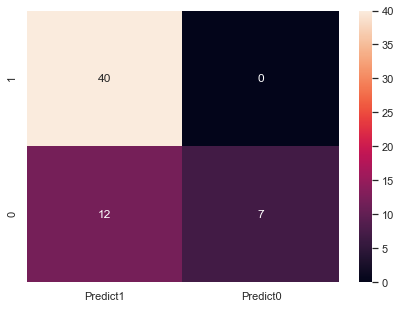

In [31]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, labels=[1,0]) 

Data_conf_mat = pd.DataFrame(conf_mat, index=[i for i in ["1","0"]],
                            columns = [i for i in ["Predict1", "Predict0"]])
                
                            

plt.figure(figsize= (7,5))

sns.heatmap(Data_conf_mat, annot = True, fmt = 'g'),

From the confusion matrix, we observe that-
  True Postives : we correctly predicted that they do have parkinsons(40)
  True Negatives : we correctly predited that they do not have parkinsons(7)
  False Postives : we incorrectly predicted that they do have parkinsons(12)Type1 error
  False Negatives : we incorrectly predicted that they do not have parkinsons(0)Type 2 error

In [32]:
resultsDf = pd.DataFrame({'Method':['Logistic Regression'],'accuracy':model_accuracy_score})
resultsDf = resultsDf[['Method','accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.79661


# Classification by K-NN Model

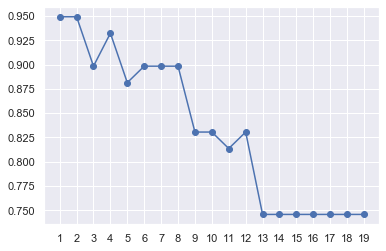

In [33]:
kscores= []
for i in range (1,20):
    Knn= KNeighborsClassifier(n_neighbors = i)
    Knn.fit(X_train, y_train)
    s = Knn.score(X_test, y_test)
    kscores.append(s)
plt.plot(range(1,20), kscores, 'o-')
plt.xticks(range(1,20))
plt.show()
    



In [34]:
Knn_model = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
Knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [35]:
 Knn_score = Knn_model.score(X_test,y_test)
print(Knn_score)

0.9491525423728814


In [36]:
Knn_y_predicted = Knn_model.predict(X_test)

In [37]:
Knn_accuracy = accuracy_score(y_test, Knn_y_predicted)
print(Knn_accuracy)

0.9491525423728814


In [38]:
print(classification_report(y_test, Knn_y_predicted, digits = 2))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.93      1.00      0.96        40

    accuracy                           0.95        59
   macro avg       0.97      0.92      0.94        59
weighted avg       0.95      0.95      0.95        59



Here, we have : accuracy = 0.95,
                precision = 0.93,
                recall    = 1.00,
                f1-score  = 0.96

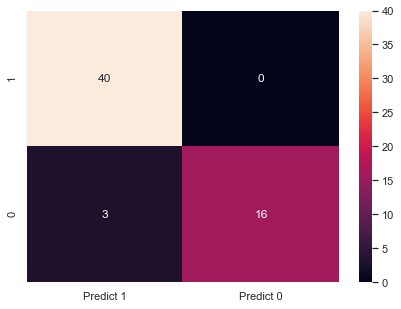

In [39]:
conf_mat = metrics.confusion_matrix(y_test, Knn_y_predicted, labels=[1,0])

Data_conf_mat = pd.DataFrame(conf_mat, index=[i for i in ["1","0"]],
                            columns=[i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(Data_conf_mat, annot = True, fmt = 'g')

From the above Confusion matrix, we observe-
   True positives = 40,
   True negatives = 16,
   False positives = 3, Type 1 error
    False negatives = 0, Type 2 error

In [40]:
tempResultsDf = pd.DataFrame({'Method' :['KNN'],'accuracy':Knn_accuracy})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method','accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.796610
0,KNN,0.949153


# Classification by Naive Bayes Model

In [41]:
# create the model
gnb_model= GaussianNB()
gnb_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
gnb_y_predicted= gnb_model.predict(X_test)

In [43]:
gnb_score=gnb_model.score(X_test,y_test)
print(gnb_score)

0.6779661016949152


In [44]:
gnb_accuracy = accuracy_score(y_test, gnb_y_predicted)
print(gnb_accuracy)

0.6779661016949152


In [45]:
print(classification_report(y_test, gnb_y_predicted, digits=2))

              precision    recall  f1-score   support

           0       0.50      0.84      0.63        19
           1       0.89      0.60      0.72        40

    accuracy                           0.68        59
   macro avg       0.69      0.72      0.67        59
weighted avg       0.76      0.68      0.69        59



Here, we have
      accuracy = 0.68,
      precision = 0.89,
      recall = 0.60,
      f1-score= 0.72

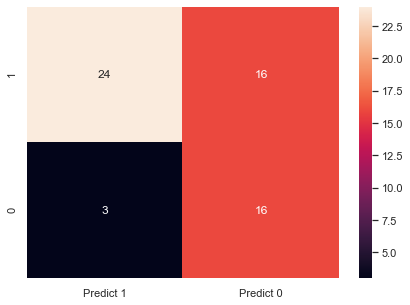

In [46]:
conf_mat = metrics.confusion_matrix(y_test, gnb_y_predicted, labels=[1,0])

Data_conf_mat = pd.DataFrame(conf_mat, index=[i for i in ["1","0"]],
                            columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(Data_conf_mat, annot=True, fmt ='g')

From the above Confusion matrix , we have
True positives = 24,
True Negatives = 16,
False positives = 3,
False Negatives = 16

In [47]:
tempResultsDf = pd.DataFrame({'Method':['Naive Bayes'],'accuracy': gnb_accuracy})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.796610
0,KNN,0.949153
0,Naive Bayes,0.677966


# SVM Model

In [48]:
from sklearn.svm import SVC
# Building a support vector machine on train data
svc_model = SVC(C=3, kernel = 'linear', gamma=0.025)
svc_model.fit(X_train,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
prediction = svc_model.predict(X_test)

In [50]:
#check the accuracy on test data
print(svc_model.score(X_test, y_test))

0.847457627118644


In [51]:
svc_accuracy = accuracy_score(y_test,prediction)

In [52]:
print(classification_report(y_test, prediction, digits = 2))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69        19
           1       0.82      1.00      0.90        40

    accuracy                           0.85        59
   macro avg       0.91      0.76      0.79        59
weighted avg       0.88      0.85      0.83        59



Here, accuracy = 0.85,
      precision = 0.82,
      recall = 1.00,
      f1-score = 0.90

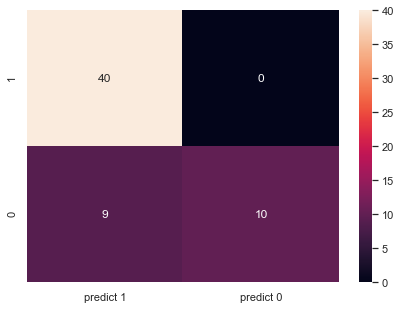

In [53]:
conf_mat = metrics.confusion_matrix(y_test, prediction, labels=[1,0])

Data_conf_mat = pd.DataFrame(conf_mat, index=[i for i in ["1","0"]],
                            columns=[i for i in ["predict 1","predict 0"]])

plt.figure(figsize=(7,5))
sns.heatmap(Data_conf_mat, annot=True, fmt='g')

From above confusion matrix, we have-
True positives = 40,
True negatives = 10,
False positives = 9,Type 1 error
False negatives = 0, Type 2 error

In [54]:
tempResultsDf = pd.DataFrame({'Method':['SVM'],'accuracy':svc_accuracy})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method','accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.796610
0,KNN,0.949153
0,Naive Bayes,0.677966
0,SVM,0.847458


# Train a meta-classifier and note the accuracy on test data

# For meta-classifier, we can use Decision Tree Classifier and Random forest classifier

In [55]:
# Build Decision tree model

dTree = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [56]:
#accuracy of the model on train data

print(dTree.score(X_train,y_train))

1.0


In [57]:
# accuracy of the model on test data

print(dTree.score(X_test,y_test))

0.864406779661017


There is a high degree of overfitting in the model .This shows why decision trees are prone to overfitting.

# Regularize/prune the decision tree by limiting the max.depth of trees and print the accuracy.

In [58]:
dTreeR = DecisionTreeClassifier(criterion  = 'entropy',random_state = 1, max_depth=6, min_samples_leaf = 5)
dTreeR.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [59]:
print(dTreeR.score(X_train,y_train))
print(dTreeR.score(X_test,y_test))

0.9705882352941176
0.8983050847457628


# when the tree is regularized, overfitting is reduced. and accuracy increased on test data

In [60]:
# importance of features in the tree building

print(pd.DataFrame(dTreeR.feature_importances_, columns =['Imp'], index = X.columns))

                       Imp
MDVP:Fo(Hz)       0.214513
MDVP:Fhi(Hz)      0.116573
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.123814
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.000000
spread1           0.000000
spread2           0.000000
D2                0.092755
PPE               0.452346


From the importance dataframe we can infer that MDVP:Fo(Hz), MDVP:Fhi(Hz), shimmer:DDA, D2 and PPE are the variables that impact our target variable(status)

In [61]:
y_predict = dTreeR.predict(X_test)

In [62]:
acc_DT = accuracy_score(y_test,y_predict)

In [63]:
print(classification_report(y_test, y_predict, digits = 2))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.89      0.97      0.93        40

    accuracy                           0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.89        59



Here, we have-
accuracy = 0.90
precision = 0.89
recall = 0.97
f1-score = 0.93

# Confusion matrix

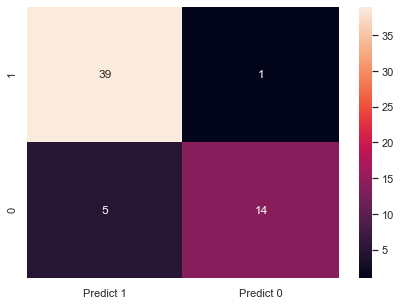

In [64]:
conf_mat = confusion_matrix(y_test, y_predict, labels=[1,0])
Data_conf_mat = pd.DataFrame(conf_mat, index=[i for i in ["1","0"]],
                            columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize =(7,5))
sns.heatmap(Data_conf_mat, annot = True, fmt = 'g')

From above confusion matrix -
True positives = 39,
True negatives = 14,
False positives = 5,
False negatives = 1

In [65]:
# Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = pd.concat([resultsDf,tempResultsDf])
resultsDf = resultsDf[['Method','accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.796610
0,KNN,0.949153
0,Naive Bayes,0.677966
0,SVM,0.847458
0,Decision Tree,0.898305


# Random Forest classifier

In [66]:
rfcl = RandomForestClassifier(n_estimators = 20, random_state = 1, max_features = 12)
rfcl = rfcl.fit(X_train, y_train)

In [67]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [68]:
print(classification_report(y_test, pred_RF, digits = 2))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.89      0.97      0.93        40

    accuracy                           0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.89        59



# COnfusion matrix for Random Forest

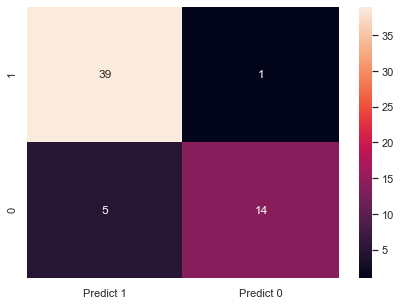

In [69]:
conf_mat = metrics.confusion_matrix(y_test, pred_RF, labels=[1,0])

Data_conf_mat = pd.DataFrame(conf_mat, index=[i for i in["1","0"]],
                            columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(Data_conf_mat, annot = True, fmt='g')

From above data,we have:
    True positives= 39,
    True negatives = 14,
    False positives = 5,
    False negatives = 1

In [70]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'],'accuracy':[acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method','accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.796610
0,KNN,0.949153
0,Naive Bayes,0.677966
0,SVM,0.847458
0,Decision Tree,0.898305
0,Random Forest,0.898305


# Train at least one standard ensemble model-Random Forest, Bagging, Boosting and Note the accuracy

# Ensemble model - Bagging

In [71]:
bgcl = BaggingClassifier(n_estimators = 10, max_samples = .7, bootstrap=True, oob_score=True, random_state=1)
bgcl = bgcl.fit(X_train,y_train)

In [72]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [73]:
print(acc_BG)

0.8813559322033898


In [74]:
print(classification_report(y_test, pred_BG, digits = 2))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.90      0.93      0.91        40

    accuracy                           0.88        59
   macro avg       0.87      0.86      0.86        59
weighted avg       0.88      0.88      0.88        59



# Print Confusion Matrix

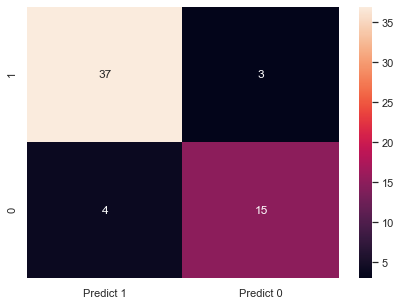

In [75]:
conf_mat = metrics.confusion_matrix(y_test, pred_BG, labels=[1,0])

Data_conf_mat = pd.DataFrame(conf_mat, index=[i for i in ["1","0"]],
                            columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize =(7,5))
sns.heatmap(Data_conf_mat, annot = True, fmt='g')


From above data, we have-
True positives = 37,
True Negatives = 15,
False positives = 4,
False negative = 3

In [76]:
# Print the accuracy

tempResultsDf = pd.DataFrame({'Method':['Bagging'],'accuracy':[acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method','accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.796610
0,KNN,0.949153
0,Naive Bayes,0.677966
0,SVM,0.847458
0,Decision Tree,0.898305
0,Random Forest,0.898305
0,Bagging,0.881356


# Apply Adaboost Ensemble Algorithm and print the accuracy

In [77]:
abcl = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.1, random_state = 1)
abcl = abcl.fit(X_train, y_train)

In [78]:
pred_AB = abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [79]:
print(classification_report(y_test, pred_AB, digits = 2))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77        19
           1       0.85      1.00      0.92        40

    accuracy                           0.88        59
   macro avg       0.93      0.82      0.85        59
weighted avg       0.90      0.88      0.87        59



# Print confusion matrix

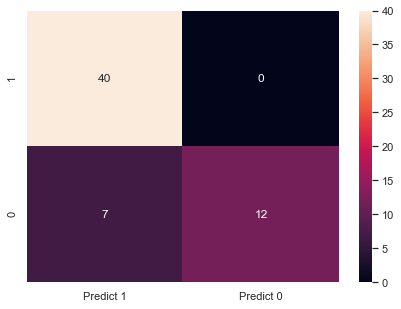

In [80]:
conf_mat = metrics.confusion_matrix(y_test, pred_AB, labels=[1,0])

Data_conf_mat = pd.DataFrame(conf_mat,index=[i for i in ["1","0"]],
                            columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(Data_conf_mat, annot = True, fmt ='g')

From above data, we have - 
True positives = 40
True Negatives = 12
False positives = 7
False negative = 0

In [81]:
# print the accuracy
tempResultsDf = pd.DataFrame({'Method':['Adaboost'],'accuracy':[acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method','accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.796610
0,KNN,0.949153
0,Naive Bayes,0.677966
0,SVM,0.847458
0,Decision Tree,0.898305
0,Random Forest,0.898305
0,Bagging,0.881356
0,Adaboost,0.881356


# Apply GradientBoost classifier and print the accuracy

In [82]:
gbcl = GradientBoostingClassifier(n_estimators = 10, learning_rate = 0.1, random_state = 1)
gbcl.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [83]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [84]:
print(classification_report(y_test, pred_GB, digits = 2))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.89      0.97      0.93        40

    accuracy                           0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.89        59



# print confusion matrix

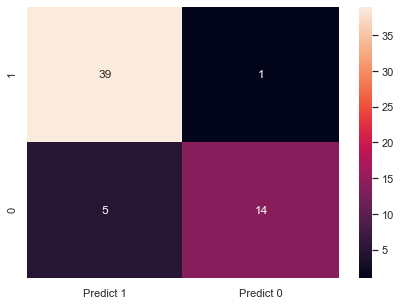

In [85]:
conf_mat = metrics.confusion_matrix(y_test, pred_GB, labels=[1,0])

Data_conf_mat = pd.DataFrame(conf_mat, index =[i for i in["1","0"]],
                            columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize=(7,5))
sns.heatmap(Data_conf_mat, annot = True, fmt = 'g')

From above data, we have-
True positives = 39,
True negatives = 14,
False positives = 5,
False negatives = 1


In [86]:
# print the accuracy
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'],'accuracy':[acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method','accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.796610
0,KNN,0.949153
0,Naive Bayes,0.677966
0,SVM,0.847458
0,Decision Tree,0.898305
0,Random Forest,0.898305
0,Bagging,0.881356
0,Adaboost,0.881356
0,Gradient Boost,0.898305


# Compare all the models and pick the best one among them

In [87]:
print('Overall Model accuracy :')
print('Logistic Regression : {0:.0f}%'. format(model_accuracy_score*100))
print('K-Nearest neighbor  : {0:.0f}%'. format(Knn_accuracy*100))
print('Naive Bayes         : {0:.0f}%'. format(gnb_accuracy*100))
print('SVM                 : {0:.0f}%'. format(svc_accuracy*100))
print('Decision Tree       : {0:.0f}%'. format(acc_DT*100))
print('Random Forest       : {0:.0f}%' . format(acc_RF*100))
print('Bagging             : {0:.0f}%'. format(acc_BG*100))
print('Ada Boost           : {0:.0f}%'.format(acc_AB*100))
print('Gradient Boost      : {0:.0f}%'. format(acc_GB*100))

Overall Model accuracy :
Logistic Regression : 80%
K-Nearest neighbor  : 95%
Naive Bayes         : 68%
SVM                 : 85%
Decision Tree       : 90%
Random Forest       : 90%
Bagging             : 88%
Ada Boost           : 88%
Gradient Boost      : 90%


From the above Accuracy data score, we found that K-Nearest Neighbors model gives the best accuracy which is 95%.
And from confusion matrix, we found that False positive(type1)error and False negative (type 2) error are least in KNN model.
 Therefore, from all the  above models, K-Nearest Neighbors is the best model to predict the person who have Parkinson's disease.
    But we also found that Random Forest and decision tree are good models. As we know, there are a few key hyper parameters like learning rate, max depth, number of estimators etc which can reverse the accurcay and classification report. 